# Week 4: Plotting Multiple Groups in Complex Data

In this demo, we'll explore how to visualize multiple groups within a dataset. Using a dataset from seaborn (the "tips" dataset), we'll compare groups such as day of the week, smoker vs. non-smoker, or sex across different plots. This helps in understanding how to present layered data insights effectively.

---

## 1. Import Libraries and Load Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set(style='whitegrid')

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display first few rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

## 2. Basic Summary of Groups

Let's see the average total bill for different groups: e.g., by day of the week.

In [2]:
# Average total bill by day
tips_grouped = tips.groupby('day')['total_bill'].mean().reset_index()
print(tips_grouped)

    day  total_bill
0  Thur   17.682742
1   Fri   17.151579
2   Sat   20.441379
3   Sun   21.410000


/var/folders/53/5bkhp7ns2pzfq1mljpn8txrw0000gn/T/ipykernel_48472/120722230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_grouped = tips.groupby('day')['total_bill'].mean().reset_index()


This gives us an overview of how groups differ.

---

## 3. Plotting Multiple Groups: Boxplot

Boxplots are excellent for comparing distributions across categories.

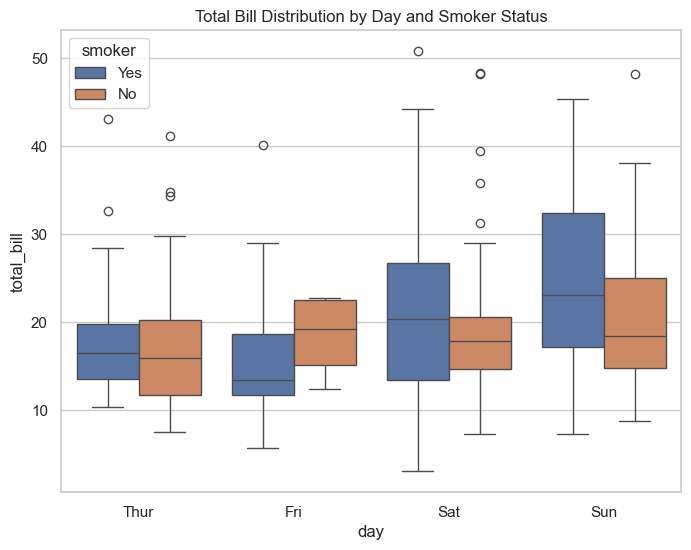

In [3]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)
plt.title('Total Bill Distribution by Day and Smoker Status')
plt.show()

**What this shows:** Boxplots of total bill across days, separated further by smoker status, illustrating variability, medians, and outliers.

---

## 4. Plotting Multiple Groups: Swarmplot

To visualize individual data points with group layers:

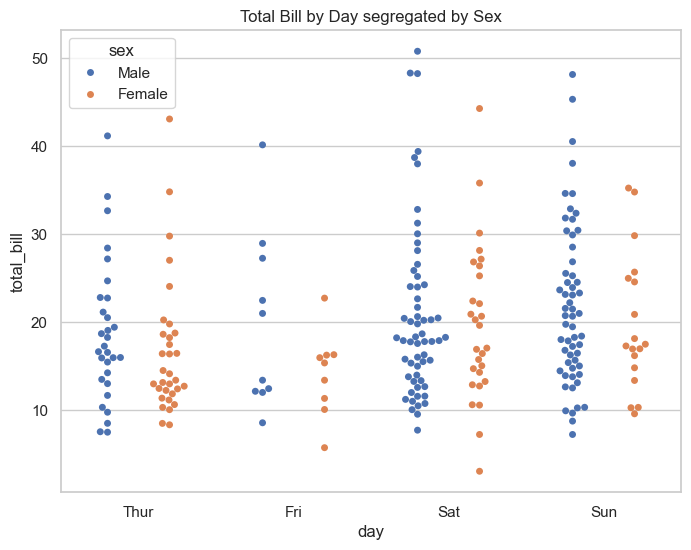

In [4]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips, dodge=True)
plt.title('Total Bill by Day segregated by Sex')
plt.show()

**Note:** `dodge=True` separates the points by the hue.

---

## 5. Comparing Two Numeric Variables Across Groups: Barplot

Calculate mean tips by day and smoker status:

/var/folders/53/5bkhp7ns2pzfq1mljpn8txrw0000gn/T/ipykernel_48472/1447459067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_mean = tips.groupby(['day', 'smoker'])['tip'].mean().reset_index()


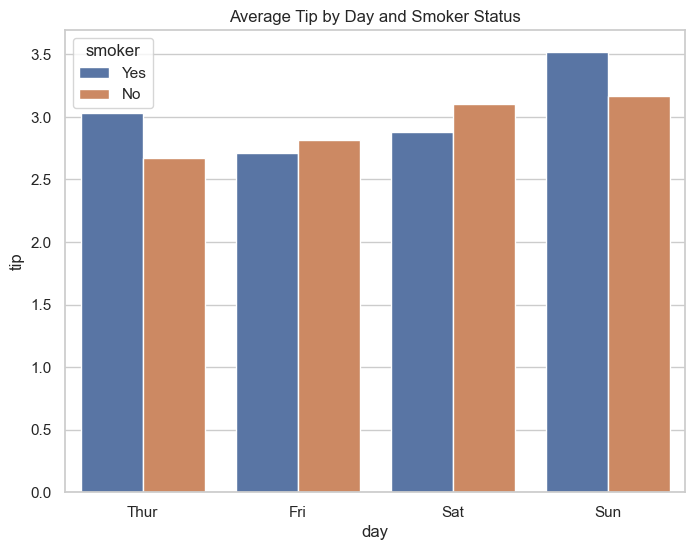

In [5]:
# Group data for mean tips
tips_mean = tips.groupby(['day', 'smoker'])['tip'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='tip', hue='smoker', data=tips_mean)
plt.title('Average Tip by Day and Smoker Status')
plt.show()

**Insights:** How tips vary across different groups.

---

## 6. Pairwise Comparison: Facet Grids

Using `FacetGrid` to compare multiple groups side by side:

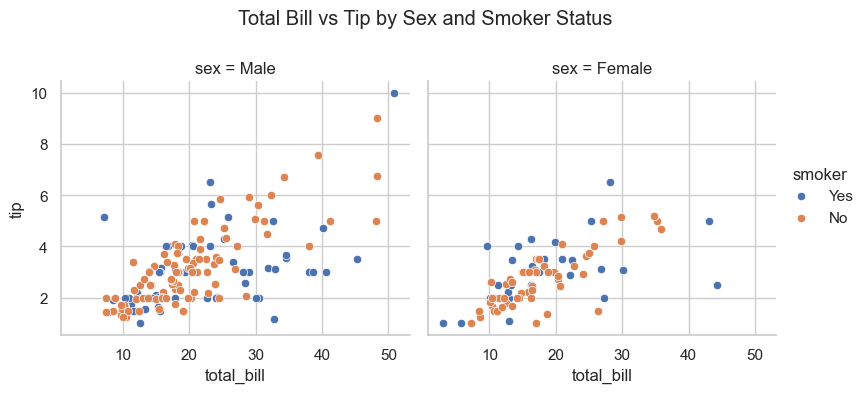

In [6]:
g = sns.FacetGrid(tips, col='sex', hue='smoker', height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip')
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Total Bill vs Tip by Sex and Smoker Status')
plt.show()

---

## 7. Summary: Plotting Multiple Groups

- Boxplots visualize distribution and variability across groups.
- Swarmplots give individual data points layered over categories.
- Barplots compare means across groups.
- FacetGrids enable side-by-side group comparisons.

These techniques allow us to tell nuanced stories about how different groups behave or differ within a dataset.

---

## Next Steps:

- Practice on your datasets by grouping variables and visualizing differences.
- Experiment with other plot types like violin plots, heatmaps, or line plots for multiple groups.
- Consider visual clarity—use labels, legends, and appropriate color schemes.